<H2>課題1：仮説検定を実装する</H2>
<p>ここでは、いわゆる古典的統計手法と言われる仮説検定をPythonで実装してみましょう。</p>
<p>レッスン6までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み</H2>

In [4]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()    # seabornデフォルトのスタイルシート適用
from scipy import stats

%matplotlib inline

<H2>2. 1標本における解析</H2>
<p>本課題では乱数を発生させることでデータを作成し、それについて解析してみましょう。</p>
<p>乱数のパラメータを変更すると結果がどう変化するのか、試してみるとより理解が深まるかと思います。</p>

In [177]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data1"に格納
data1 = stats.norm.rvs(loc = 100, scale = 1, size = 10000)
# stats.norm.rvs() =>期待値loc，標準偏差scaleの正規分布に従う確率変数をsize個取得
data1

array([100.49688214,  99.90215242, 100.73989134, ...,  99.28552725,
        99.18637365,  99.60097072])

(array([   3.,    3.,   13.,   32.,   93.,  213.,  397.,  684.,  963.,
        1273., 1451., 1435., 1221.,  880.,  574.,  408.,  214.,   93.,
          33.,   17.]),
 array([ 96.01140601,  96.37626046,  96.74111491,  97.10596936,
         97.47082381,  97.83567827,  98.20053272,  98.56538717,
         98.93024162,  99.29509607,  99.65995053, 100.02480498,
        100.38965943, 100.75451388, 101.11936833, 101.48422279,
        101.84907724, 102.21393169, 102.57878614, 102.94364059,
        103.30849505]),
 <a list of 20 Patch objects>)

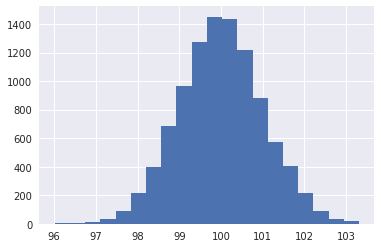

In [122]:
#　data1のヒストグラムを作成
plt.hist(data1, bins=20)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


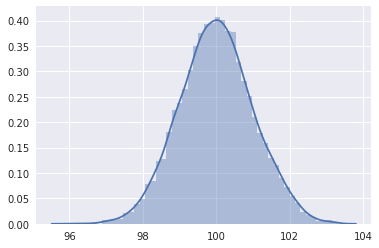

In [123]:
sns.distplot(data1)

In [124]:
# 母平均の点推定を計算（＝標本平均を母平均として扱う）
mu =sp.mean(data1)   #sum(data1) / len(data1)
mu

100.00124406283156

In [125]:
df = len(data1) - 1
df

9999

In [126]:
sigma = sp.std(data1, ddof=1)  #標準偏差σを計算する際、データの個数Nではなく”N-ddof”で割る(標本標準偏差 =>不偏標準偏差)
se = sigma/sp.sqrt(len(data1)) #標準誤差SE=σ/ √n
se

0.010026953686203781

In [127]:
# 95%信頼区間の推定を行い、上側信頼限界と下側信頼限界の値を表示
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale = se)
interval

(99.9815892155456, 100.02089891011752)

In [128]:
# 任意のt値を設定し、片側検定した結果を表示
t_value = 2
alpha = stats.t.cdf(t_value, df=df)
1-alpha

0.022763631680755125

In [129]:
# 任意のt値を設定し、両側検定した結果を表示
t_value = 2
alpha =stats.t.cdf(t_value, df =df)
(1-alpha)*2

0.04552726336151025

<H2>3. 2標本における解析</H2>
<p>標本をもう1つ増やし、先ほどの標本と差があるのか否かについて検討してみましょう。</p>

In [171]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data2"に格納
data2 = stats.norm.rvs(loc=99.95, scale=2, size=10000)
data2

array([103.5028373 ,  95.34279276,  96.06253667, ...,  99.61360533,
        99.19704909,  99.07722081])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


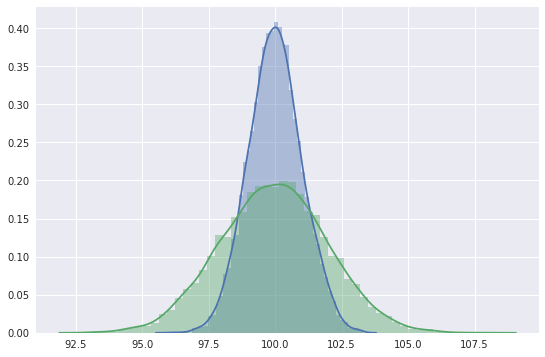

In [172]:
# data1とdata2をヒストグラムにてプロット
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(data1)
sns.distplot(data2)

In [173]:
# data1, data2それぞれの値を使って「対応のあるt検定」で計算し、結果を表示
difference = data1 - data2
stats.ttest_1samp(difference,0)

Ttest_1sampResult(statistic=2.3778819503973545, pvalue=0.01743108358551868)

In [174]:
# data1, data2それぞれの値を使って「対応のないt検定」で計算し、結果を表示
stats.ttest_ind(data1, data2, equal_var=False)

Ttest_indResult(statistic=2.377283162615784, pvalue=0.01745339547300015)

<h2>4. ここまでの仮説検定の結果を解釈して下記に記載してください</h2>

data1はdata2と「有意に異なる」
（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）